♥

# TECH CHALLENGE 1 - Projeto utilizando a técnica de regressão </center>

---

♥



> Notebook responsável pelas etapas:

1.   Pré-processamento de dados ✅
2.   Modelagem ✅
3.   Treinamento e avaliação do modelo ✅
4.   Validação estatística ✅


♥









# Import das Bibliotecas

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import VarianceThreshold
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
import warnings

In [85]:
# Ignorar warnings para melhor visualização do output
warnings.filterwarnings('ignore')

In [86]:
target_col_name = "VAL_TOT"

# Montar o drive para chamar a base de dados

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import da base de dados

In [88]:
pd.set_option('display.max_columns', None)

In [89]:
essential_cols_raw = [
    "UF_ZI", "ANO_CMPT", "MES_CMPT", "ESPEC", "SEXO",
    "NASC", "DT_INTER", "DT_SAIDA", "DIAG_PRINC", "DIAG_SECUN",
    "PROC_SOLIC", "PROC_REA", "VAL_TOT", "VAL_UTI",
    "QT_DIARIAS", "DIAR_ACOM", "IDADE", "DIAS_PERM", "MORTE",
    "NACIONAL", "CAR_INT", "NUM_FILHOS", "INSTRU", "CID_NOTIF",
    "COBRANCA", "NATUREZA", "NAT_JUR", "GESTAO", "IND_VDRL", "MUNIC_MOV",
    "COD_IDADE", "HOMONIMO", "CONTRACEP1", "CONTRACEP2", "GESTRISCO",
    "CBOR", "CNAER", "VINCPREV", "GESTOR_COD", "GESTOR_TP", "GESTOR_DT",
    "INFEHOSP", "CID_ASSO", "CID_MORTE", "COMPLEX", "FINANC", "FAEC_TP",
    "REGCT", "RACA_COR", "ETNIA",
    "VAL_UCI", "MARCA_UCI", "UTI_MES_TO", "UTI_INT_TO","MUNIC_RES","PROC_SOLIC"
]

In [90]:
df = pd.read_csv('/content/drive/MyDrive/FIAP IA Para Devs/Tech Challenge 01/data/processed/sp_1232024_process.csv', low_memory=False, usecols=essential_cols_raw)
df.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,MUNIC_RES,NASC,SEXO,UTI_MES_TO,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_TOT,VAL_UTI,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,NAT_JUR,GESTAO,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,CAR_INT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_DT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,VAL_UCI,MARCA_UCI
0,350550,2024,3,1,350550,19761220,1,0,0,0,2,408050578,408050578,926.05,0.0,20240115,20240117,5073,0,12,0,3999,1,0,350550,4,47,2,0,10,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,6,0,0,3,0,0.0,0
1,350550,2024,3,1,351200,19691122,1,0,0,0,2,406010773,406010773,741.54,0.0,20240123,20240124,2060,0,31,0,3999,1,0,350550,4,54,1,0,10,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,6,0,0,3,0,0.0,0
2,350550,2024,3,1,351740,19950817,3,2,0,0,2,415010012,415010012,12859.63,2100.0,20240122,20240126,3215,0,12,0,3999,1,0,350550,4,28,4,0,10,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3,6,0,0,1,0,0.0,0
3,350550,2024,3,1,350550,19510711,1,0,0,0,2,408020539,408020539,288.90,0.0,20240122,20240124,4993,0,12,0,3999,1,0,350550,4,72,2,0,10,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,6,0,0,1,0,0.0,0
4,350550,2024,3,1,353390,19880519,3,0,0,0,1,415040035,415040035,814.61,0.0,20240216,20240217,4559,0,12,0,3999,1,0,350550,4,35,1,0,10,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,6,0,0,1,0,0.0,0


In [91]:
data = df.copy()

# 1) Pré-processamento de dados



## 1.1) Função para Otimização de Tipos de Dados (Downcasting)


In [92]:
def optimize_dtypes(df):
    """
    Otimiza os tipos de dados de um DataFrame para reduzir o consumo de memória.
    Converte para tipos numéricos menores, e strings categóricas para tipo 'category'.
    """
    print("\nIniciando otimização de tipos de dados...")
    initial_memory = df.memory_usage(deep=True).sum() / (1024**2)
    print(f"Uso de memória antes da otimização: {initial_memory:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        if col_type == "object":
            try:
                temp_series = pd.to_numeric(df[col], errors='coerce')
                if not temp_series.isnull().all() and (temp_series.count() / len(temp_series) > 0.5):
                    df[col] = temp_series
                    if pd.api.types.is_integer_dtype(df[col]):
                        df[col] = pd.to_numeric(df[col], downcast='integer', errors='ignore')
                    elif pd.api.types.is_float_dtype(df[col]):
                        df[col] = pd.to_numeric(df[col], downcast='float', errors='ignore')
                    continue
            except:
                pass

            num_unique_values = df[col].nunique()
            num_total_values = len(df[col])


            if num_unique_values > 0 and (num_unique_values / num_total_values < 0.5 or num_unique_values < 500):
                df[col] = df[col].astype('category')


        elif pd.api.types.is_integer_dtype(col_type):
            df[col] = pd.to_numeric(df[col], downcast='integer', errors='ignore')
        elif pd.api.types.is_float_dtype(col_type):
            df[col] = pd.to_numeric(df[col], downcast='float', errors='ignore')

    final_memory = df.memory_usage(deep=True).sum() / (1024**2)
    print(f"Uso de memória após otimização: {final_memory:.2f} MB")
    print(f"Redução de memória: {(initial_memory - final_memory):.2f} MB")
    return df

In [93]:
data = optimize_dtypes(data)


Iniciando otimização de tipos de dados...
Uso de memória antes da otimização: 101.47 MB
Uso de memória após otimização: 24.44 MB
Redução de memória: 77.02 MB


## 1.2) Remover linhas com o target nulo

Tratamento de valores ausentes - remover linhas com o target nulo
Para outras colunas, você pode optar por imputação (média, mediana, moda) ou remover.

In [94]:
initial_rows = data.shape[0]
if data[target_col_name].isnull().any():
    data.dropna(subset=[target_col_name], inplace=True)
    print(f"Linhas removidas devido a valores nulos no target: {initial_rows - data.shape[0]}")
else:
    print("Nenhum valor nulo no target.")

Nenhum valor nulo no target.


In [95]:
columns_to_drop_full = [
    "N_AIH", "CGC_HOSP", "CEP", "INSC_PN", "SEQUENCIA", "REMESSA",
    "AUD_JUST", "SIS_JUST", "CPF_AUT", "GESTOR_CPF", "CNES", "CNPJ_MANT",
    "UTI_MES_IN", "UTI_MES_AN", "UTI_MES_AL", "UTI_INT_IN", "UTI_INT_AN", "UTI_INT_AL",
    "VAL_SADT", "VAL_RN", "VAL_ACOMP", "VAL_ORTP", "VAL_SANGUE", "VAL_SADTSR", "VAL_TRANSP",
    "VAL_OBSANG", "VAL_PED1AC", "RUBRICA", "TOT_PT_SP", "NUM_PROC"
]

In [96]:
columns_to_drop_existing = [col for col in columns_to_drop_full if col in data.columns]
if columns_to_drop_existing:
    data.drop(columns=columns_to_drop_existing, inplace=True)
    print(f"Colunas removidas: {', '.join(columns_to_drop_existing)}")
else:
    print("Nenhuma das colunas pré-definidas para remoção foi encontrada no DataFrame.")

Nenhuma das colunas pré-definidas para remoção foi encontrada no DataFrame.


## 1.3) Limpeza e conversão de colunas

In [97]:
potential_numeric_cols = [
    "UTI_MES_TO", "UTI_INT_TO", "DIAR_ACOM", "QT_DIARIAS",
    "VAL_TOT", "VAL_UTI", "IDADE", "DIAS_PERM", "NUM_FILHOS",
     "VAL_UCI"
]

for col in potential_numeric_cols:
    if col in data.columns and data[col].dtype != 'float32': # Já otimizadas não precisam de re-processamento
        data[col] = data[col].astype(str).str.strip().str.replace(",", ".", regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')
        if data[col].isnull().any():
            median_val = data[col].median()
            data[col].fillna(median_val, inplace=True)
        data[col] = data[col].astype(np.float32)
    elif col not in data.columns:
        print(f"Coluna numérica potencial '{col}' não encontrada no DataFrame.")

In [98]:
date_cols = ["NASC", "DT_INTER", "DT_SAIDA", "GESTOR_DT"]
for col in date_cols:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], format='%Y%m%d', errors='coerce')
        if data[col].isnull().any():
            mode_date = data[col].mode()[0] if not data[col].mode().empty else pd.Timestamp('1900-01-01')
            data[col].fillna(mode_date, inplace=True)
    else:
        print(f"Coluna de data '{col}' não encontrada no DataFrame.")

## 1.4) Feature Engineering das colunas NASC e DI_INTER

In [99]:
if "NASC" in data.columns and "DT_INTER" in data.columns:
    data['IDADE_NA_INTERNACAO'] = (data['DT_INTER'] - data['NASC']).dt.days / 365.25
    data['IDADE_NA_INTERNACAO'] = data['IDADE_NA_INTERNACAO'].apply(lambda x: max(0, x)).fillna(data['IDADE_NA_INTERNACAO'].median()).astype(np.int16)
    print("Feature 'IDADE_NA_INTERNACAO' criada.")
    if 'IDADE' in data.columns:
        data['IDADE_FINAL'] = data['IDADE_NA_INTERNACAO']
        data.drop(columns=['IDADE', 'NASC'], inplace=True, errors='ignore')
    else:
        data['IDADE_FINAL'] = data['IDADE_NA_INTERNACAO']
        data.drop(columns=['NASC'], inplace=True, errors='ignore')

Feature 'IDADE_NA_INTERNACAO' criada.


In [100]:
if "DI_INTER" in data.columns and "DT_SAIDA" in data.columns:
    data['DURACAO_INTERNACAO_CALC'] = (data['DT_SAIDA'] - data['DT_INTER']).dt.days
    data['DURACAO_INTERNACAO_CALC'] = data['DURACAO_INTERNACAO_CALC'].apply(lambda x: max(0, x)).fillna(0).astype(np.int16)
    print("Feature 'DURACAO_INTERNACAO_CALC' criada.")
    if 'DIAS_PERM' in data.columns:
        data['DIAS_PERM_FINAL'] = data['DURACAO_INTERNACAO_CALC']
        data.drop(columns=['DIAS_PERM', 'DI_INTER', 'DT_SAIDA'], inplace=True, errors='ignore')
    else:
        data['DIAS_PERM_FINAL'] = data['DURACAO_INTERNACAO_CALC']
        data.drop(columns=['DT_INTER', 'DT_SAIDA'], inplace=True, errors='ignore')

data.drop(columns=[col for col in date_cols if col in data.columns], errors='ignore', inplace=True)

## 1.5) Tratamento de Colunas Categóricas

In [101]:
high_cardinality_cols = [
    "MUNIC_RES", "PROC_SOLIC", "PROC_REA", "DIAG_PRINC", "DIAG_SECUN",
    "CID_NOTIF", "CID_ASSO", "CID_MORTE", "ETNIA"
]

TOP_N_CATEGORIES = 20

for col in high_cardinality_cols:
    if col in data.columns:
        data[col] = data[col].astype(str).str.strip()
        data[col].replace('', 'MISSING', inplace=True)
        data[col].fillna('MISSING', inplace=True)

        if data[col].nunique() > TOP_N_CATEGORIES:
            top_categories = data[col].value_counts().nlargest(TOP_N_CATEGORIES).index.tolist()
            data[col] = data[col].apply(lambda x: x if x in top_categories else 'OUTROS')
            print(f"Coluna '{col}' (alta cardinalidade) agrupada em {TOP_N_CATEGORIES}+'OUTROS'.")
        data[col] = data[col].astype('category')
    elif col not in data.columns:
        print(f"Coluna de alta cardinalidade '{col}' não encontrada para agrupamento.")

Coluna 'MUNIC_RES' (alta cardinalidade) agrupada em 20+'OUTROS'.
Coluna 'PROC_SOLIC' (alta cardinalidade) agrupada em 20+'OUTROS'.
Coluna 'PROC_REA' (alta cardinalidade) agrupada em 20+'OUTROS'.
Coluna 'DIAG_PRINC' (alta cardinalidade) agrupada em 20+'OUTROS'.
Coluna 'ETNIA' (alta cardinalidade) agrupada em 20+'OUTROS'.


In [102]:
for col in data.select_dtypes(include='object').columns.tolist():
    data[col] = data[col].astype(str).str.strip()
    data[col].replace('', 'MISSING', inplace=True)
    data[col].fillna('MISSING', inplace=True)
    data[col] = data[col].astype('category') # Garante que são do tipo category para OHE

categorical_cols_for_ohe = data.select_dtypes(include='category').columns.tolist()

if categorical_cols_for_ohe:
    data = pd.get_dummies(data, columns=categorical_cols_for_ohe, drop_first=True, dummy_na=False)
    print(f"DataFrame após One-Hot Encoding. Novas dimensões: {data.shape}")
else:
    print("Nenhuma coluna categórica para One-Hot Encoding encontrada.")

DataFrame após One-Hot Encoding. Novas dimensões: (241806, 151)


## 1.6) Escalonamento das features numéricas

In [103]:
numerical_features_final = data.select_dtypes(include=np.number).columns.tolist()
if target_col_name in numerical_features_final:
    numerical_features_final.remove(target_col_name)

if numerical_features_final:
    scaler = StandardScaler()
    data[numerical_features_final] = scaler.fit_transform(data[numerical_features_final])
    print("Features numéricas escalonadas.")
else:
    print("Nenhuma feature numérica para escalonamento encontrada.")

Features numéricas escalonadas.


# 2) Modelagem

## 2.1) Definindo o target e as features:

In [104]:
def split_features_target(df, target_col):
    try:
        target = df.pop(target_col)
    except KeyError:
        raise ValueError(
            f"A coluna '{target_col}' (target) não foi encontrada no DataFrame. "
            "Verifique o carregamento/limpeza."
        )
    return df, target

In [105]:
features, target = split_features_target(data, target_col_name)

## 2.2) Remover features com baixa variância

In [106]:
print("\nVerificando e removendo features com baixa variância...")
initial_features_count = features.shape[1]
selector = VarianceThreshold(threshold=0.001) # Um limiar pequeno para remover quase constantes
# Ajusta e transforma no conjunto de treino
features_selected = selector.fit_transform(features)

# Obtém os nomes das colunas mantidas
selected_feature_names = features.columns[selector.get_support(indices=True)]
features = pd.DataFrame(features_selected, columns=selected_feature_names, index=features.index)

removed_features_count = initial_features_count - features.shape[1]
if removed_features_count > 0:
    print(f"Removidas {removed_features_count} features com baixa variância.")
    print(f"Novas dimensões das features: {features.shape}")
else:
    print("Nenhuma feature removida por baixa variância.")


Verificando e removendo features com baixa variância...
Removidas 31 features com baixa variância.
Novas dimensões das features: (241806, 119)


## 2.3) Divisão entre treino e teste

In [107]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(f"Conjunto de Treino: {X_train.shape[0]} amostras, {X_train.shape[1]} features")
print(f"Conjunto de Teste: {X_test.shape[0]} amostras, {X_test.shape[1]} features")

Conjunto de Treino: 193444 amostras, 119 features
Conjunto de Teste: 48362 amostras, 119 features


## 2.3) Criação dos modelos

In [108]:
models = {
    'DecisionTree': DecisionTreeRegressor(
        random_state=42
    ),
    'RandomForest': RandomForestRegressor(
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBRegressor(
        random_state=42,
        n_jobs=-1
    ),
    'MLP': MLPRegressor(
        random_state=42,
        max_iter=500
    )
}

In [109]:
pipelines = {
    name: make_pipeline(StandardScaler(), model)
    for name, model in models.items()
}

# 3) Treinamento e avaliação do modelo

## 3.1) Processo de treinar todos os pepilenes

In [110]:
trained_pipelines = {}

In [111]:
for name, pipe in pipelines.items():
    print(f"Treinando {name}...")
    pipe.fit(X_train, y_train)
    trained_pipelines[name] = pipe
print("\nTodos os modelos foram treinados.")

Treinando DecisionTree...
Treinando RandomForest...
Treinando XGBoost...
Treinando MLP...

Todos os modelos foram treinados.


## 3.2) Processo de evolução dos modelos

In [112]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name=""):
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    mse_train  = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mae_train  = mean_absolute_error(y_train, y_train_pred)
    r2_train   = r2_score(y_train, y_train_pred)

    mse_test   = mean_squared_error(y_test, y_test_pred)
    rmse_test  = np.sqrt(mse_test)
    mae_test   = mean_absolute_error(y_test, y_test_pred)
    r2_test    = r2_score(y_test, y_test_pred)

    print(f"\n--- {model_name} Avaliação ---")
    print(" Treino:")
    print(f"   MSE:  {mse_train:.2f}")
    print(f"   RMSE: {rmse_train:.2f}")
    print(f"   MAE:  {mae_train:.2f}")
    print(f"   R²:   {r2_train:.4f}")
    print(" Teste:")
    print(f"   MSE:  {mse_test:.2f}")
    print(f"   RMSE: {rmse_test:.2f}")
    print(f"   MAE:  {mae_test:.2f}")
    print(f"   R²:   {r2_test:.4f}")

    # Gráfico de Real vs. Predito
    plt.figure(figsize=(8, 6))
    sns.regplot(x=y_test, y=y_test_pred,
                scatter_kws={'alpha': 0.3},
                line_kws={'linestyle':'--'})
    lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
    plt.plot(lims, lims, 'k--', linewidth=1)
    plt.xlabel("Real")
    plt.ylabel("Predito")
    plt.title(f"{model_name}: Real vs. Predito")
    plt.tight_layout()
    plt.show()

    # Gráfico da distribuição dos resíduos
    residuals = y_test - y_test_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True, bins=40)
    plt.xlabel("Resíduos")
    plt.ylabel("Frequência")
    plt.title(f"{model_name}: Distribuição dos Resíduos")
    plt.tight_layout()
    plt.show()


--- DecisionTree Avaliação ---
 Treino:
   MSE:  12302.16
   RMSE: 110.92
   MAE:  9.45
   R²:   0.9994
 Teste:
   MSE:  7314370.61
   RMSE: 2704.51
   MAE:  570.07
   R²:   0.6641


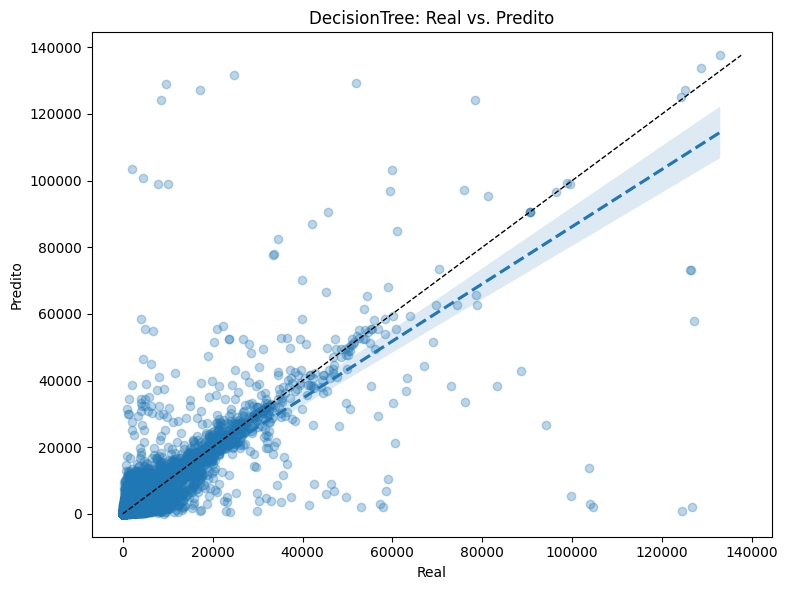

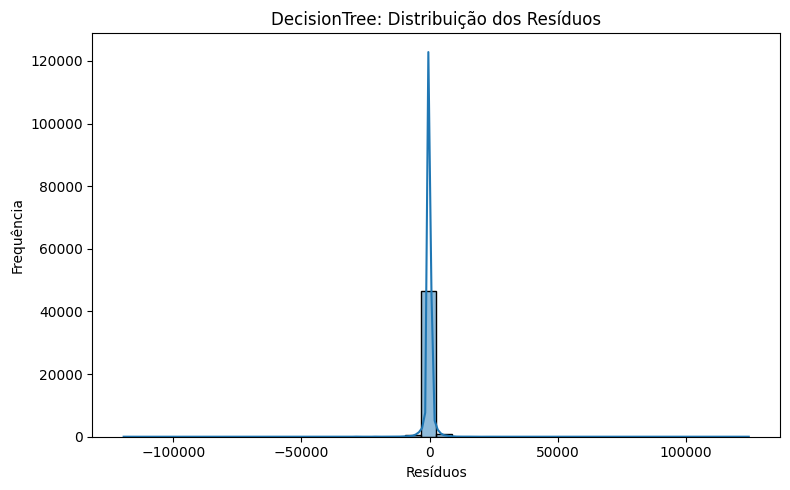


--- RandomForest Avaliação ---
 Treino:
   MSE:  494085.75
   RMSE: 702.91
   MAE:  169.94
   R²:   0.9774
 Teste:
   MSE:  3323104.71
   RMSE: 1822.94
   MAE:  449.89
   R²:   0.8474


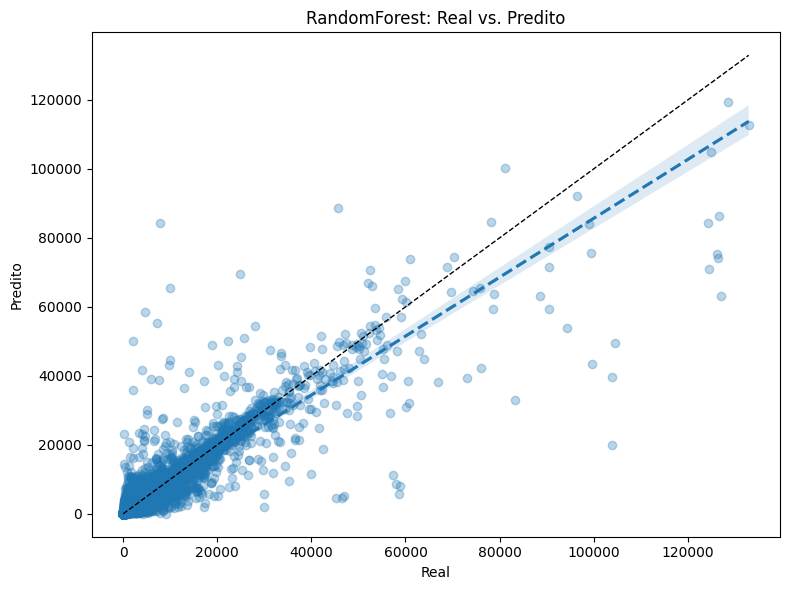

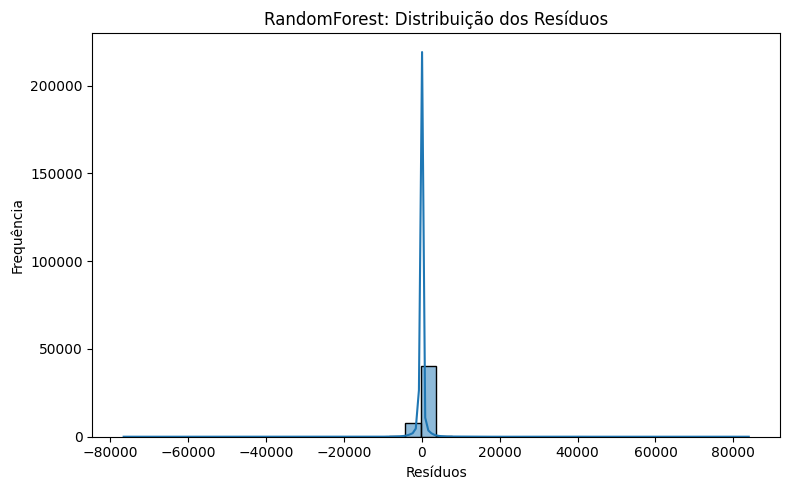


--- XGBoost Avaliação ---
 Treino:
   MSE:  1837250.25
   RMSE: 1355.45
   MAE:  445.18
   R²:   0.9159
 Teste:
   MSE:  3835303.00
   RMSE: 1958.39
   MAE:  502.43
   R²:   0.8239


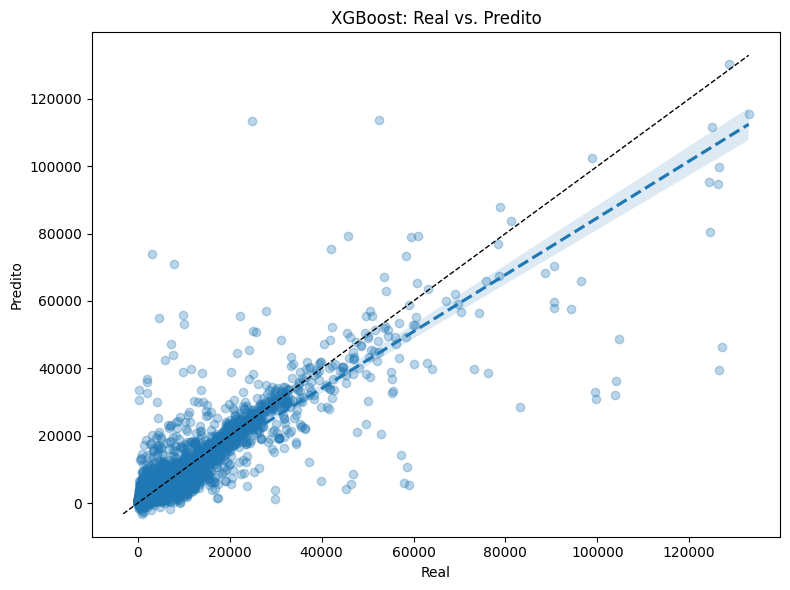

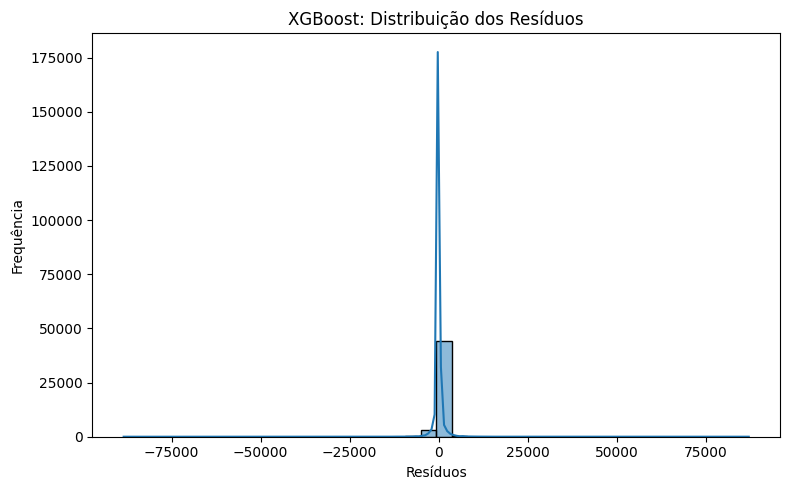


--- MLP Avaliação ---
 Treino:
   MSE:  6413622.09
   RMSE: 2532.51
   MAE:  654.35
   R²:   0.7064
 Teste:
   MSE:  6581208.45
   RMSE: 2565.39
   MAE:  658.57
   R²:   0.6978


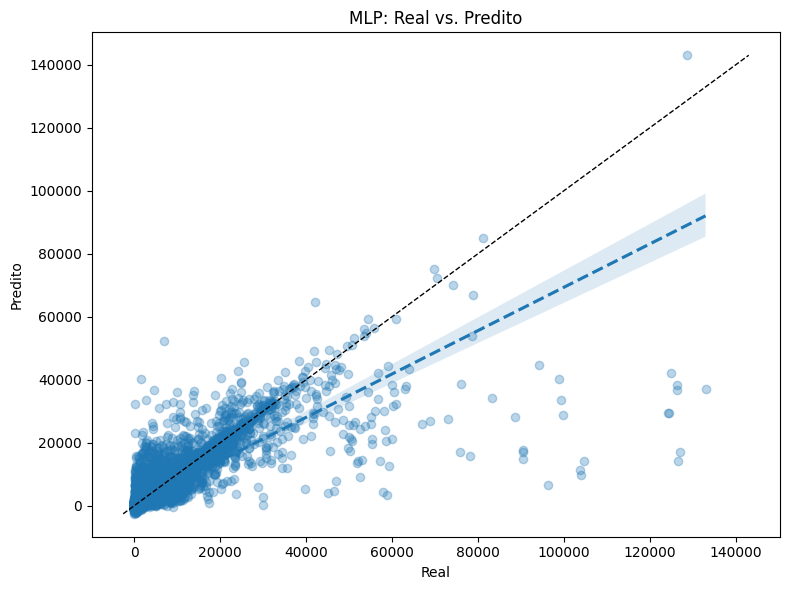

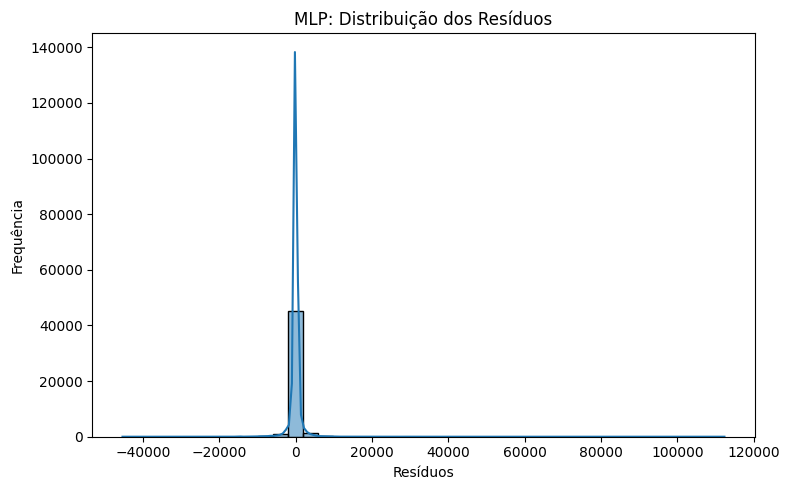

In [113]:
for name, trained_pipe in trained_pipelines.items():
    evaluate_model(
        trained_pipe,
        X_train, y_train,
        X_test,  y_test,
        model_name=name
    )

# 4) Validação Estatística

In [114]:
X_train_sm = sm.add_constant(X_train, has_constant='add')

In [115]:
try:
    X_train_sm_unique = X_train_sm.T.drop_duplicates().T
    if X_train_sm.shape[1] != X_train_sm_unique.shape[1]:
        print(f"Atenção: {X_train_sm.shape[1] - X_train_sm_unique.shape[1]} colunas duplicadas exatas foram removidas para statsmodels.")
        X_train_sm = X_train_sm_unique

    model_sm = sm.OLS(y_train, X_train_sm).fit()
    print(model_sm.summary())
except np.linalg.LinAlgError as e:
    print(f"Erro ao gerar o sumário do Statsmodels: {e}")
    print("Isso pode ocorrer se houver multicolinearidade perfeita ou colunas idênticas/quase constantes,")
    print("mesmo após a remoção de baixa variância e drop_first=True.")
    print("Verifique as features restantes para correlação ou singularidade.")
    print("Possíveis causas: poucas amostras vs. muitas features, ou uma feature é linearmente dependente de outras.")
except Exception as e:
    print(f"Ocorreu um erro inesperado ao gerar o sumário do Statsmodels: {e}")

Atenção: 2 colunas duplicadas exatas foram removidas para statsmodels.
                            OLS Regression Results                            
Dep. Variable:                VAL_TOT   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     2092.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        11:22:48   Log-Likelihood:            -1.8299e+06
No. Observations:              193444   AIC:                         3.660e+06
Df Residuals:                  193326   BIC:                         3.661e+06
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------